In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

In [55]:
df = pd.read_table('../GIS_LSH_VE_CF/data/data.csv',sep=",",names=['user_id','latitude','longitude','location id'],encoding='latin-1',engine='python')
plt.style.use('fivethirtyeight')
df.head()

,user_id,latitude,longitude,location id
0,0,30.235909,-97.795140,22847
1,0,30.269103,-97.749395,420315
2,1,48.863379,2.333329,1500177
3,1,48.863379,2.333329,1500177
4,2,34.043023,-118.267157,14637


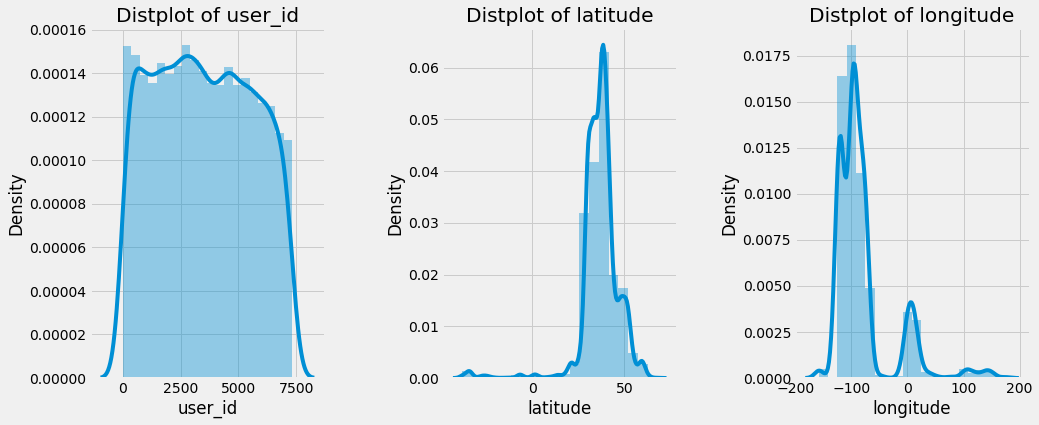

In [56]:
# 查看用户和经纬度分布
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['user_id' , 'latitude' , 'longitude']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

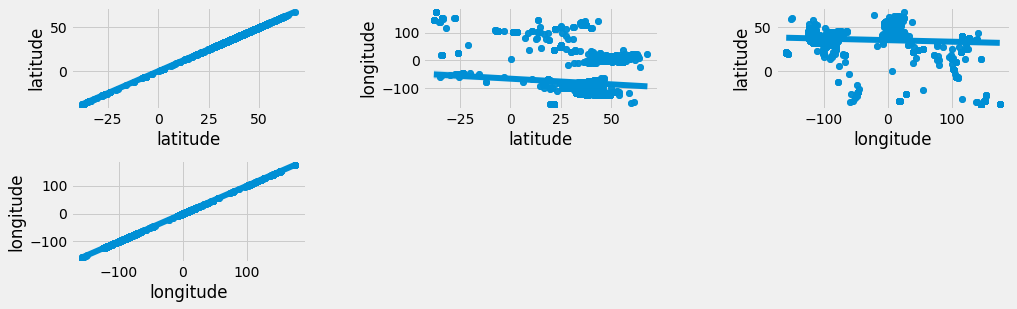

In [57]:
# 进行回归拟合查看
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['latitude' , 'longitude']:
    for y in ['latitude' , 'longitude']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

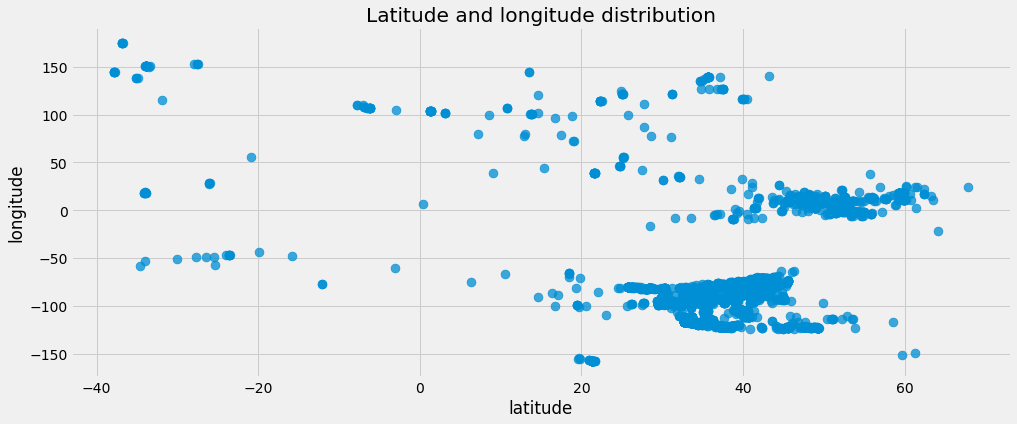

In [58]:
# 数据分布
plt.figure(1 , figsize = (15 , 6))
# for location in ['latitude' , 'longitude']:
plt.scatter(x = 'latitude' , y = 'longitude' , data = df ,
                s = 80 , alpha = 0.5 )
plt.xlabel('latitude' ), plt.ylabel('longitude') 
plt.title('Latitude and longitude distribution')
plt.show()

# 寻找最佳聚类中心个数

In [59]:
# 进行k-means聚类
X1 = df[['latitude' , 'longitude']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_) # .inertia_是一种聚类评估指标，这个评价参数表示的是簇中某一点到簇中心点距离的和，

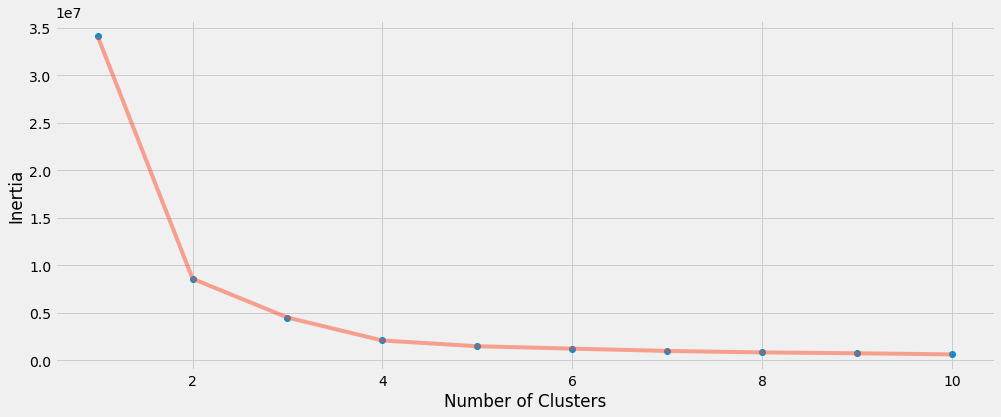

In [60]:
# 随着聚类中心个数变化聚类效果的变化
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

# 确定为4最佳，生成k-means对象

In [62]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [63]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

# 生成随机直线进行测试

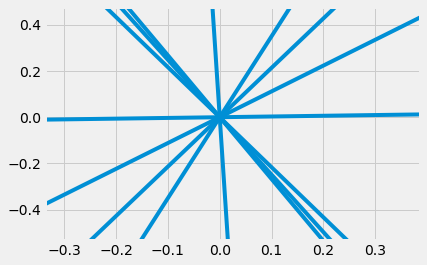

In [51]:
def hash_function(nbits=8,d=2):
    plane_norms_groups = np.empty([nbits,d])
    plane_norms_groups = np.random.rand(nbits,d) - .5
    return plane_norms_groups,nbits
test = hash_function()
for i in test[0]:
    plt.axline((0, 0), i)

# 绘制聚类中心图

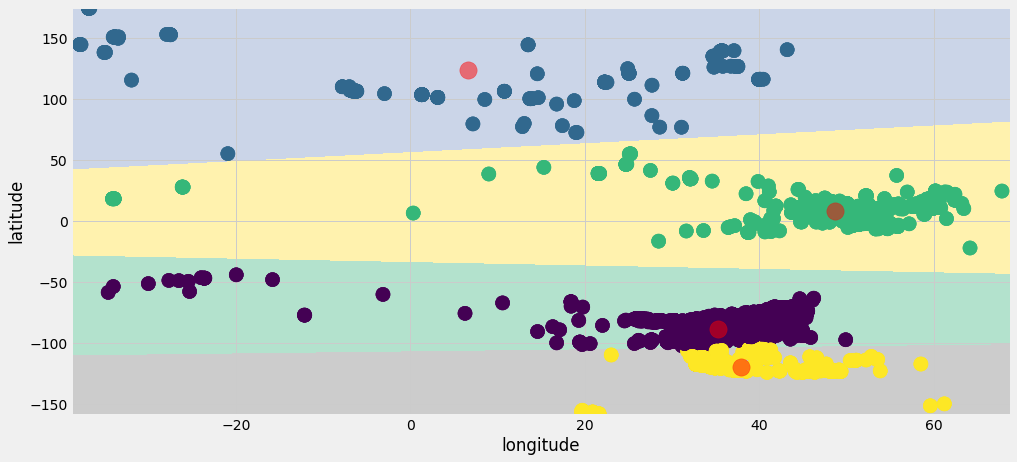

In [65]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
# Z聚类对象，extent边界框架，aspect用于控制轴的纵横比。
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
           
plt.scatter( x = 'latitude' ,y ='longitude' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)

plt.ylabel('latitude') , plt.xlabel('longitude')
plt.savefig('../GIS_LSH_VE_CF/picture/k-means.jpg',dpi=500)
plt.show()


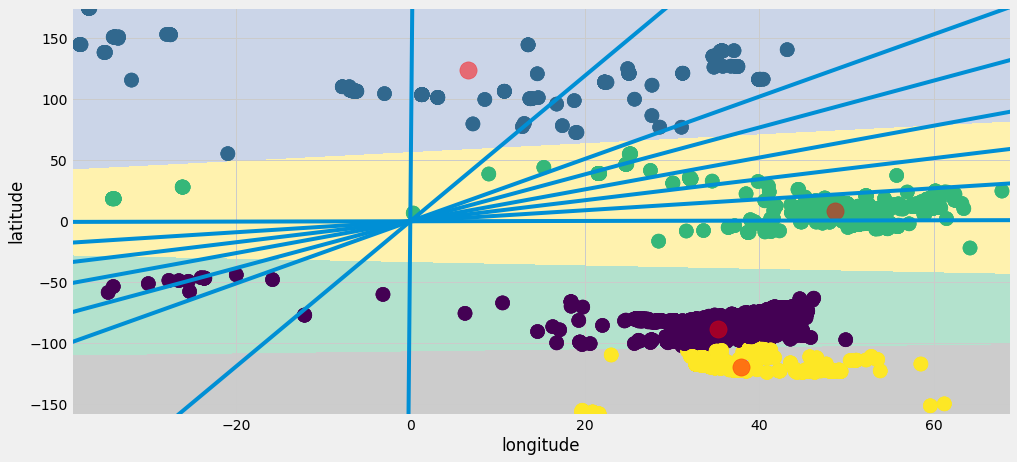

In [66]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
import numpy as np 
def hash_function(nbits=8,d=2):
    plane_norms_groups = np.empty([nbits,d])
    plane_norms_groups = np.random.rand(nbits,d) - .5
    return plane_norms_groups,nbits
test = hash_function()
for i in test[0]:
    plt.axline((0, 0), i)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'latitude' ,y ='longitude' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('latitude') , plt.xlabel('longitude')
plt.show()

## 根据聚类中心设置直线

In [79]:
cl = algorithm.cluster_centers_
id = cl[:,1].argsort()
row,col = cl.shape
mid = np.zeros((row-1,col)) 
for i in range(3): # 根据聚类中心点个数，返回中心直线
    mid[i,:] = (cl[id[i],:]+cl[id[i+1],:])/2
mid

array([[  36.570798  , -104.02609941],
       [  41.95403431,  -39.82988936],
       [  27.65408229,   66.15650303]])

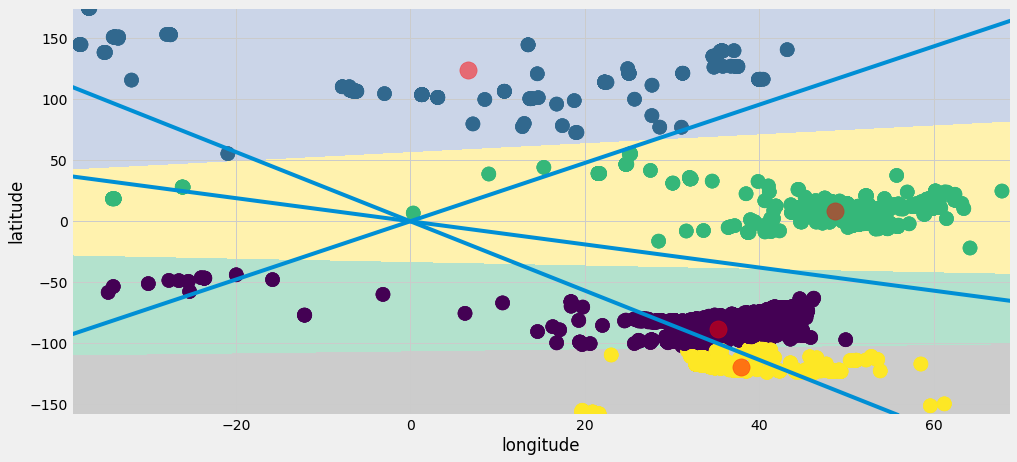

In [80]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
for i in mid:
    plt.axline((0, 0), i)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'latitude' ,y ='longitude' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('latitude') , plt.xlabel('longitude')
plt.show()